In [1]:
# In this cell we are installing Fastai, the software package needed for image classification.
#!pip install fastai --upgrade

# After installing Fastai, we will import the vision module.
from fastai.vision.all import *

In [3]:
# Download the image dataset as tgz file. This is like a zip file.
# This file contain 4 folders named 'daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'

!wget "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

--2022-05-23 03:13:08--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.251.18.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz.1’

flower_photos.tgz.1 100%[===================>] 218.21M   104MB/s    in 2.1s    

2022-05-23 03:13:10 (104 MB/s) - ‘flower_photos.tgz.1’ saved [228813984/228813984]



In [4]:
# Unzip the folder

!tar xzf flower_photos.tgz 

In [7]:
# Get the file name to the images and store it under the variable flower_path

flower_path = Path("/content/flower_photos/")

In [11]:
# Now we are going to load all those images into the variable dls.
# We will keep 20% of the files for validation. This is done by setting valid_pct=0.2
# For AI model to work all images should be of the same size. We are going to resize all images to 224 X 224 size by setting item_tfms=Resize(224)

dls = ImageDataLoaders.from_folder(flower_path, valid_pct=0.2, item_tfms=Resize(224))

In [17]:
# Lets look at the categories of flowers in our dataset
dls.vocab

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

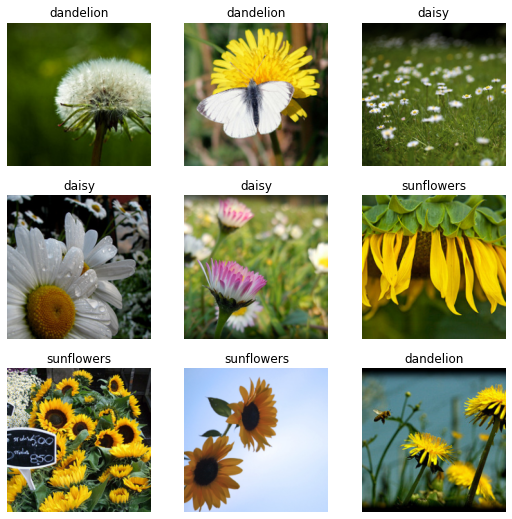

In [12]:
# Now let us look at the data

dls.show_batch()

In [18]:
# Create a vision learner using our dataset dls and pretrained model resnet34. We are printing accuracy as the metrics
# resnet model is orginally trained on millions of ImageNet data

learn = vision_learner(dls, resnet34, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.134497,0.359980,0.880109,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.383748,0.246796,0.922343,00:21
1,0.237857,0.292788,0.920981,00:22
2,0.149032,0.210089,0.937330,00:22
3,0.088418,0.182349,0.944142,00:22
4,0.052619,0.176189,0.945504,00:22


In [ ]:
# Now let us fine tune the resnet model on our flowers dataset.

learn.fine_tune(5)

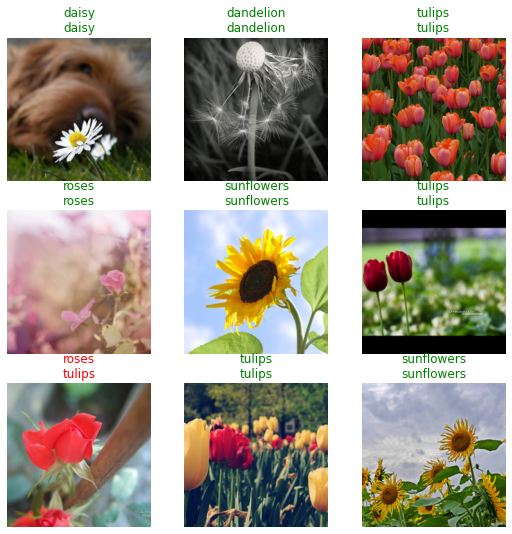

In [19]:
# Inspect the results.
# Top label is the actual label and the lower label is the label predicted by our model

learn.show_results()

In [20]:
import ipywidgets as widgets


#hide_output
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

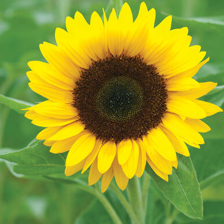

In [27]:
img = PILImage.create(uploader.data[0])
img.to_thumb(224)

In [28]:
learn.predict(uploader.data[0])

('sunflowers',
 TensorBase(3),
 TensorBase([4.1458e-09, 1.3025e-07, 1.2511e-09, 1.0000e+00, 6.4398e-11]))